In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
# national data 
# ======================
URL_DATA = './staging/gold/national_data_gold_data.parquet'
national_data = pd.read_parquet(URL_DATA)


In [18]:
national_data

,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_mean_income(%)
0,2016,31633500,1229312000000,38861000000,2.1,14667800.0,14163700.0,504100.0,6987600.0,3.0,67.7,6958.0,5228.0,16.0
1,2017,32022600,1300769000000,40620000000,3.8,14980100.0,14476800.0,503300.0,7065000.0,3.0,68.0,7272.3,5443.0,16.0
2,2018,32382300,1363766000000,42115000000,1.0,15280300.0,14776000.0,504300.0,7094400.0,3.0,68.3,7586.7,5658.0,17.0
3,2019,32523000,1423952000000,43783000000,0.7,15581600.0,15073400.0,508200.0,7103500.0,3.0,68.7,7901.0,5873.0,17.0
4,2020,32447400,1346249000000,41490000000,-1.1,15406000.0,14719400.0,686600.0,7105200.0,4.0,68.4,7089.0,5209.0,16.0
5,2021,32576300,1390882000000,42696149000,2.5,15532800.0,14825200.0,707600.0,7102300.0,5.0,68.6,7784.0,5773.5,16.0
6,2022,32698100,1514139000000,46306600000,3.4,15769700.0,15155200.0,614500.0,7000700.0,4.0,69.3,8479.0,6338.0,17.0


In [19]:
national_data['income_inequality_percent'] = (
    (national_data['income_mean_national(RM)'] - national_data['income_median_national(RM)']) /
    national_data['income_mean_national(RM)']
) * 100

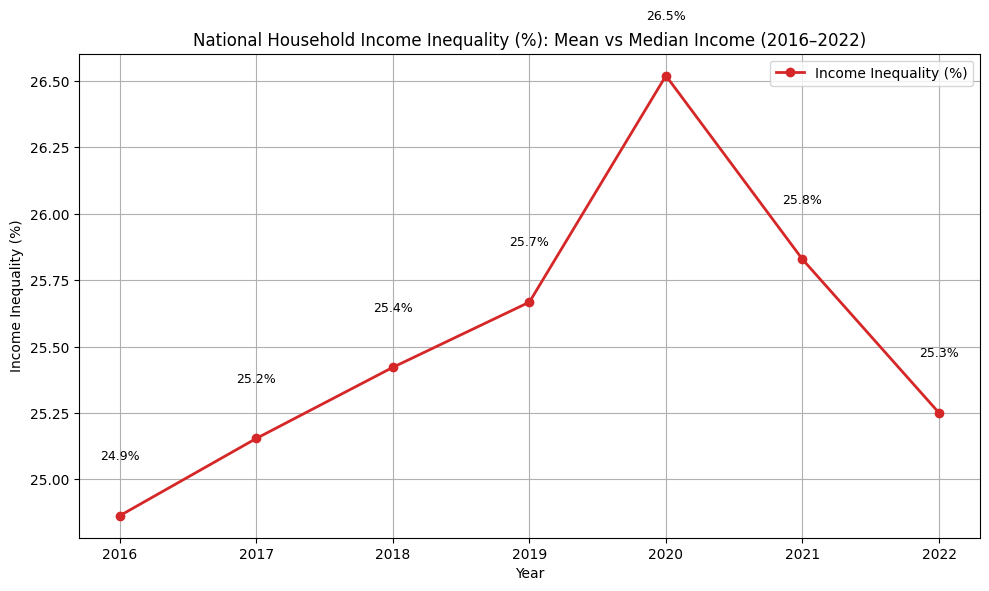

In [20]:
# --- Step 2: Plot ---
plt.figure(figsize=(10, 6))
plt.plot(national_data['year'], national_data['income_inequality_percent'],
         color='tab:red', marker='o', linewidth=2, label='Income Inequality (%)')

# Add data labels (optional)
for x, y in zip(national_data['year'], national_data['income_inequality_percent']):
    plt.text(x, y + 0.2, f"{y:.1f}%", ha='center', va='bottom', fontsize=9)

# --- Step 3: Customize plot ---
plt.title('National Household Income Inequality (%): Mean vs Median Income (2016–2022)')
plt.xlabel('Year')
plt.ylabel('Income Inequality (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

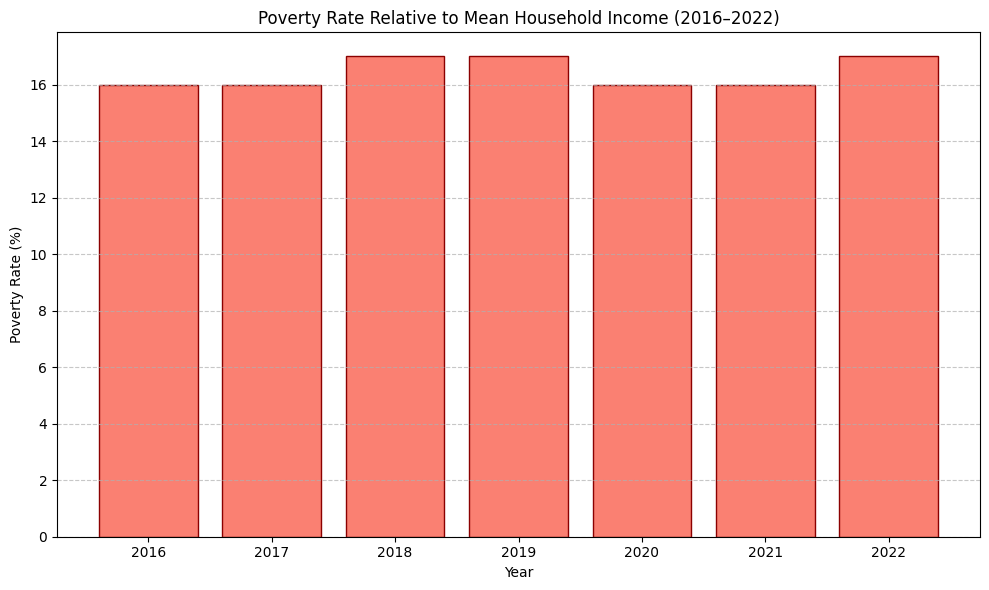

In [24]:
import matplotlib.pyplot as plt

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(
    national_data['year'],
    national_data['poverty_relative_national_mean_income(%)'],
    color='salmon',
    edgecolor='darkred'
)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate Relative to Mean Household Income (2016–2022)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


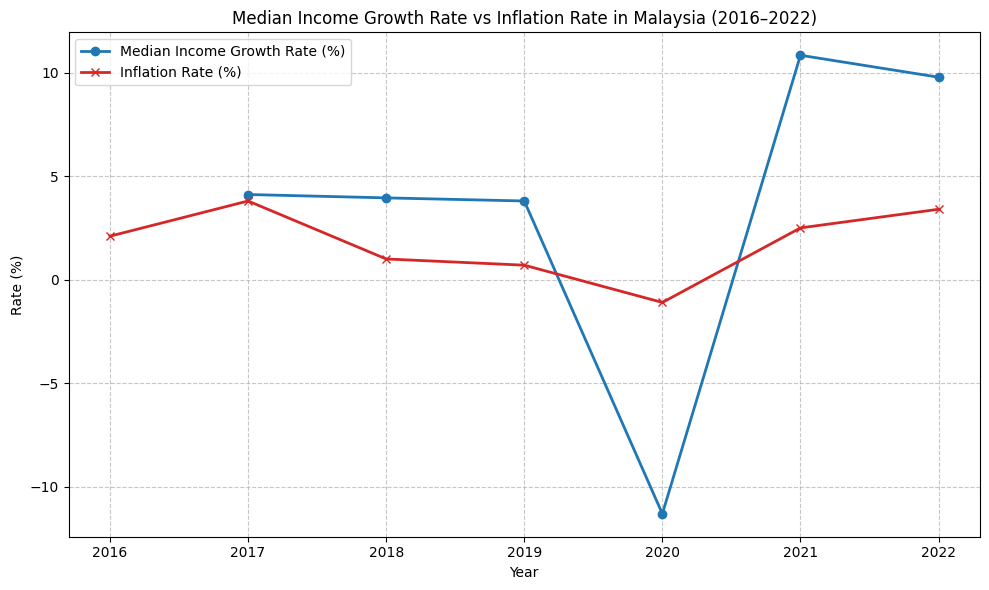

In [27]:
import matplotlib.pyplot as plt

# --- Calculate Derived Column: Median Income Growth Rate (%)
national_data['income_median_growth_rate(%)'] = national_data['income_median_national(RM)'].pct_change() * 100

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))

# Line for Median Income Growth Rate
ax.plot(
    national_data['year'],
    national_data['income_median_growth_rate(%)'],
    color='tab:blue',
    marker='o',
    linewidth=2,
    label='Median Income Growth Rate (%)'
)

# Line for Inflation
ax.plot(
    national_data['year'],
    national_data['Inflation(%)'],
    color='tab:red',
    marker='x',
    linewidth=2,
    label='Inflation Rate (%)'
)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate (%)')
plt.title('Median Income Growth Rate vs Inflation Rate in Malaysia (2016–2022)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


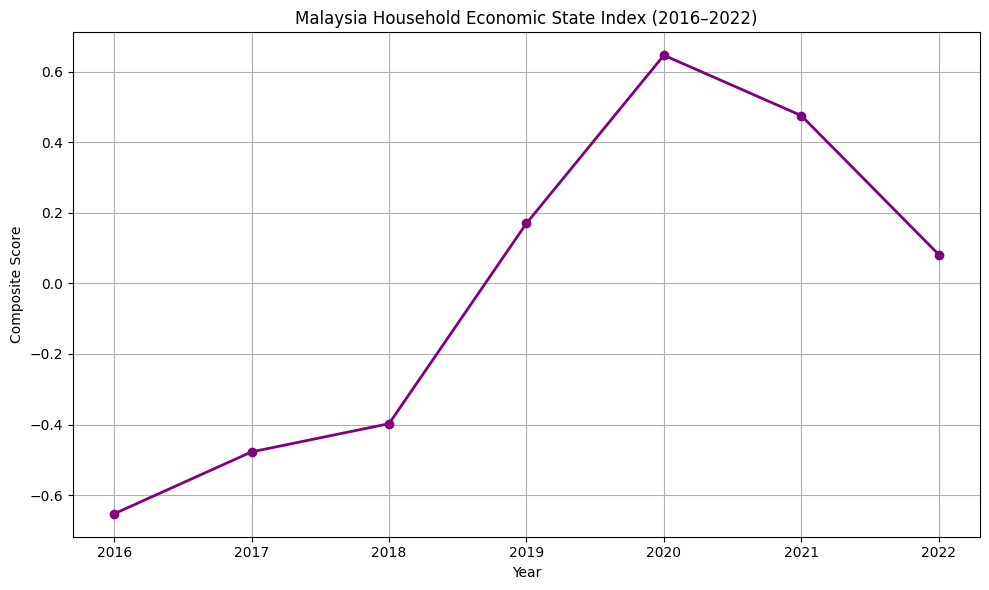

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Select and rename the components
df_esi = national_data[['year',
                        'income_mean_national(RM)',
                        'employed_persons_national',
                        'Inflation(%)',
                        'poverty_relative_national_mean_income(%)']].copy()

# Rename for clarity
df_esi.columns = ['year', 'income', 'employment', 'inflation', 'poverty']

# Step 2: Normalize using Min-Max scaling
scaler = MinMaxScaler()

# Apply to each component (reshape needed)
df_esi['income_score'] = scaler.fit_transform(df_esi[['income']])
df_esi['employment_score'] = scaler.fit_transform(df_esi[['employment']])
df_esi['inflation_score'] = scaler.fit_transform(df_esi[['inflation']])
df_esi['poverty_score'] = scaler.fit_transform(df_esi[['poverty']])

# Step 3: Calculate the Economic State Index
df_esi['economic_state_index'] = (
    df_esi['income_score'] +
    df_esi['employment_score'] -
    df_esi['inflation_score'] -
    df_esi['poverty_score']
)

# Step 4: Plot as Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df_esi['year'], df_esi['economic_state_index'], color='purple', marker='o', linewidth=2)
plt.title('Malaysia Household Economic State Index (2016–2022)')
plt.xlabel('Year')
plt.ylabel('Composite Score')
plt.grid(True)
plt.tight_layout()
plt.show()


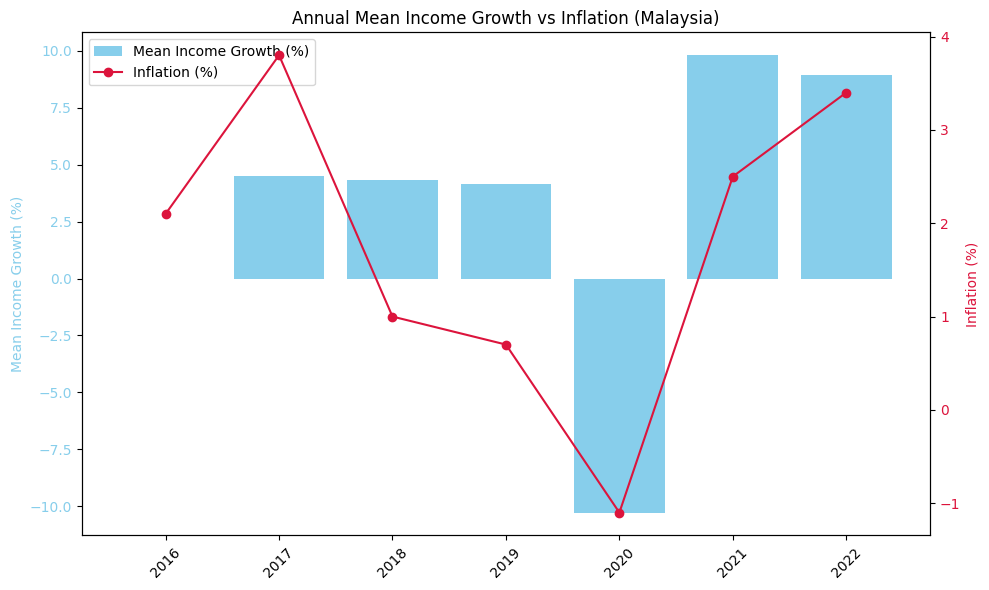

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate annual mean income growth %
national_data['income_mean_growth'] = national_data['income_mean_national(RM)'].pct_change() * 100

# Remove NaN (first value will be NaN because pct_change)
income_growth = national_data['income_mean_growth'].fillna(0)  # or use .dropna() but lengths must match for plotting

years = national_data['year']
inflation = national_data['Inflation(%)']

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for mean income growth
bars = ax1.bar(years, income_growth, color='skyblue', label='Mean Income Growth (%)')
ax1.set_ylabel('Mean Income Growth (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

# Line plot for inflation on secondary axis
ax2 = ax1.twinx()
line = ax2.plot(years, inflation, color='crimson', marker='o', label='Inflation (%)')
ax2.set_ylabel('Inflation (%)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Add combined legend
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title('Annual Mean Income Growth vs Inflation (Malaysia)')
plt.tight_layout()
plt.show()


# EDA state level

In [48]:
# state  data 
# ======================
URL_DATA = './staging/gold/state_data_gold_data.parquet'
state_data = pd.read_parquet(URL_DATA)


In [49]:
state_data

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),income_median_state(RM),expenditure_mean_state(RM),expenditure_median_state(RM),poverty_relative_state_mean_income(%)
0,2016,Johor,3651800,1.166822e+11,1639100.0,1580600.0,58500.0,820700.0,4.0,6928.0,5652.0,4167.0,3635.0,14.0
1,2017,Johor,3697000,1.235613e+11,1673800.0,1616700.0,57100.0,824400.0,3.0,7289.7,5910.3,4386.7,3769.3,14.0
2,2018,Johor,3749400,1.305859e+11,1745100.0,1693300.0,51900.0,788200.0,3.0,7651.3,6168.7,4606.3,3903.7,15.0
3,2019,Johor,3761200,1.342259e+11,1805700.0,1756100.0,49600.0,761600.0,3.0,8013.0,6427.0,4826.0,4038.0,15.0
4,2020,Johor,4009700,1.280736e+11,1990900.0,1920500.0,70300.0,826900.0,4.0,7264.0,5690.0,4998.0,4237.3,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2018,Kuala Lumpur,1790000,2.203590e+11,844900.0,824400.0,20500.0,396600.0,2.0,12735.3,10057.0,6709.3,5553.3,12.0
94,2019,Kuala Lumpur,1782500,2.337937e+11,863400.0,841000.0,22400.0,369600.0,3.0,13257.0,10549.0,6947.0,5719.0,11.0
95,2020,Kuala Lumpur,1982100,2.174470e+11,1049500.0,1006400.0,43100.0,408300.0,4.0,11728.0,9093.0,7239.0,5890.0,9.0
96,2021,Kuala Lumpur,1964000,2.198837e+11,1040700.0,992500.0,48300.0,414000.0,5.0,12526.5,9663.5,7531.0,6061.0,11.0


In [44]:
tes = state_data[state_data["state"] == "Kuala Lumpur"]
tes

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),income_median_state(RM),expenditure_mean_state(RM),expenditure_median_state(RM),poverty_relative_state_mean_income(%)
91,2016,Kuala Lumpur,1789700,1.916410e+11,855400.0,827200.0,28200.0,400700.0,3.0,11692.0,9073.0,6234.0,5222.0,14.0
92,2017,Kuala Lumpur,1793200,2.061753e+11,871400.0,844300.0,27100.0,396900.0,3.0,12213.7,9565.0,6471.7,5387.7,13.0
93,2018,Kuala Lumpur,1790000,2.203590e+11,844900.0,824400.0,20500.0,396600.0,2.0,12735.3,10057.0,6709.3,5553.3,12.0
94,2019,Kuala Lumpur,1782500,2.337937e+11,863400.0,841000.0,22400.0,369600.0,3.0,13257.0,10549.0,6947.0,5719.0,11.0
95,2020,Kuala Lumpur,1982100,2.174470e+11,1049500.0,1006400.0,43100.0,408300.0,4.0,11728.0,9093.0,7239.0,5890.0,9.0
96,2021,Kuala Lumpur,1964000,2.198837e+11,1040700.0,992500.0,48300.0,414000.0,5.0,12526.5,9663.5,7531.0,6061.0,11.0
97,2022,Kuala Lumpur,1961200,2.405175e+11,1060300.0,1019700.0,40500.0,397300.0,4.0,13325.0,10234.0,7823.0,6232.0,13.0


C:\Users\Acer\AppData\Local\Temp\ipykernel_6004\584653699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['GDPpc'] = tes['gdp_per_state(RM)'] / tes['population_state']
C:\Users\Acer\AppData\Local\Temp\ipykernel_6004\584653699.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Employment_Rate'] = tes['employed_persons_state'] / tes['labour_force_state']
C:\Users\Acer\AppData\Local\Temp\ipykernel_6004\584653699.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

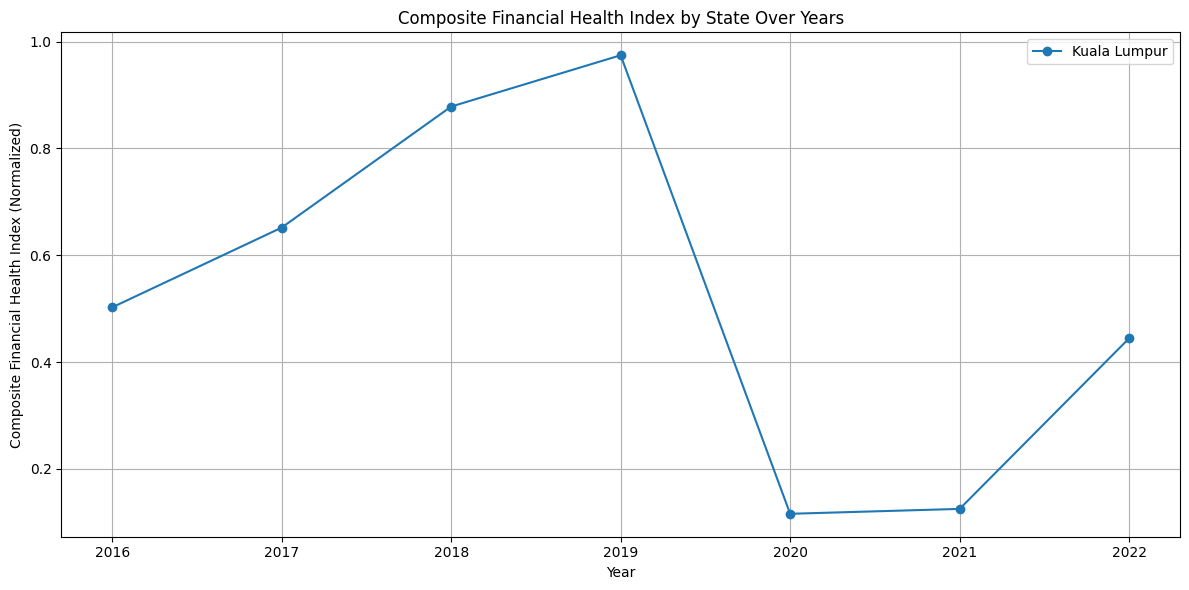

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data: use your full dataframe 'tes'
# tes = pd.read_csv('your_data.csv')  # Assuming you load it

# Compute GDP per capita
tes['GDPpc'] = tes['gdp_per_state(RM)'] / tes['population_state']

# Compute Employment Rate (% employed in labour force)
tes['Employment_Rate'] = tes['employed_persons_state'] / tes['labour_force_state']

# Compute Savings Rate = (mean income - mean expenditure) / mean income
tes['Savings_Rate'] = (tes['income_mean_state(RM)'] - tes['expenditure_mean_state(RM)']) / tes['income_mean_state(RM)']

# Some states might have 0 or missing data, drop or fillna if necessary
tes.dropna(subset=['GDPpc', 'Employment_Rate', 'Savings_Rate'], inplace=True)

# Scale (normalize) the three features between 0 and 1
scaler = MinMaxScaler()
tes[['GDPpc_norm', 'Employment_Rate_norm', 'Savings_Rate_norm']] = scaler.fit_transform(
    tes[['GDPpc', 'Employment_Rate', 'Savings_Rate']]
)

# Calculate Composite Financial Health Index as average of normalized metrics
tes['Composite_Financial_Health_Index'] = tes[
    ['GDPpc_norm', 'Employment_Rate_norm', 'Savings_Rate_norm']
].mean(axis=1)

plt.figure(figsize=(12, 6))

for state in tes['state'].unique():
    state_data = tes[tes['state'] == state]
    plt.plot(state_data['year'], state_data['Composite_Financial_Health_Index'], marker='o', label=state)

plt.title('Composite Financial Health Index by State Over Years')
plt.xlabel('Year')
plt.ylabel('Composite Financial Health Index (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Create synthetic data
np.random.seed(42)

n = 100
X1 = np.random.normal(50, 10, n)
X2 = X1 + np.random.normal(0, 2, n)    # highly correlated with X1
X3 = np.random.normal(30, 5, n)
X4 = X3 + np.random.normal(0, 2, n)    # highly correlated with X3
y = 3*X1 + 2*X3 + np.random.normal(0, 5, n)

df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4,
    'target': y
})


In [4]:
df

,X1,X2,X3,X4,target
0,54.967142,52.136400,31.788937,30.130947,220.507160
1,48.617357,47.776066,32.803923,31.683561,208.463041
2,56.476885,55.791456,35.415256,36.909843,240.287387
3,65.230299,63.625744,35.269010,36.489751,266.463819
4,47.658466,47.335895,23.111653,23.069850,186.948378
...,...,...,...,...,...
95,35.364851,36.135485,26.535452,25.597101,161.860006
96,52.961203,51.193488,34.497999,31.071730,222.693376
97,52.610553,52.918003,31.536498,34.244242,219.952960
98,50.051135,50.167552,34.064311,33.835231,213.903934


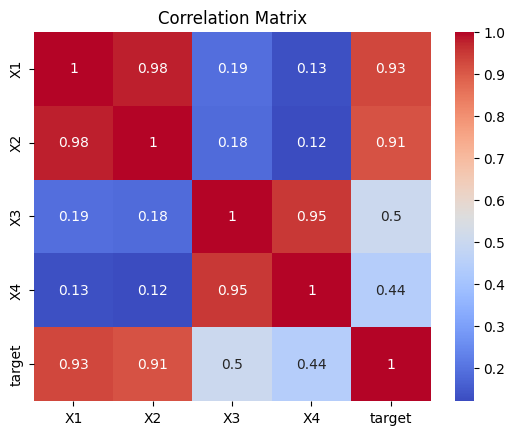

Selected features based on correlation (>= 0.7): ['X1', 'X2']


In [5]:
# Step 3: Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Select features highly correlated with target (e.g., ≥ 0.7 and < 1.0)
target_corr = corr_matrix['target'].drop('target')
selected_corr_feats = target_corr[(abs(target_corr) >= 0.7) & (abs(target_corr) < 1)].index.tolist()

print("Selected features based on correlation (>= 0.7):", selected_corr_feats)


In [6]:
# Step 4: VIF calculation
X = df[selected_corr_feats]
X_const = add_constant(X)

vif_df = pd.DataFrame()
vif_df['feature'] = X_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)


  feature        VIF
0   const  30.951790
1      X1  22.796489
2      X2  22.796489


In [7]:
# Step 5: Random Forest Feature Importance
X_rf = df[['X1', 'X2', 'X3', 'X4']]
y_rf = df['target']

model = RandomForestRegressor(random_state=42)
model.fit(X_rf, y_rf)

feat_importance = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_importance)


  Feature  Importance
0      X1    0.624140
1      X2    0.292081
3      X4    0.044470
2      X3    0.039309
